In [313]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import codecs

In [314]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)

In [315]:
import warnings
warnings.filterwarnings('ignore')

In [316]:
import matplotlib as mlp

plt.style.use('dark_background')

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 15
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 15
mlp.rcParams['xtick.color'] = '#4DFC2D'

mlp.rcParams['ytick.major.size'] = 15
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 15
mlp.rcParams['ytick.color'] = '#4DFC2D'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#ED6919'
mlp.rcParams['axes.labelcolor'] = '#ED6919'

<!-- # df = pd.read_excel('../descr/descriptions/description.xlsx')

# df.head() -->

In [317]:
def column_to_snake_case(name):
    return name.lower().replace(' ', '_')

In [318]:
f = codecs.open('../data/Предки.csv', 'r', 'cp1251')
ancestors = pd.read_csv(f, sep=';', encoding='utf-8')

ancestors.columns = pd.Series(ancestors.columns).apply(column_to_snake_case)

ancestors.head()

,номер_животного,ушная_бирка_животного,номер_матери,код_отца,отец_матери
0,1,570034283,0.0,-,-
1,2,533487712,0.0,-,-
2,3,897733157,0.0,-,-
3,4,584322510,0.0,-,-
4,6,887578050,0.0,-,-


In [319]:
ancestors.shape

(25499, 5)

In [320]:
ancestors.isna().sum()

номер_животного          0
ушная_бирка_животного    1
номер_матери             1
код_отца                 1
отец_матери              1
dtype: int64

In [321]:
ancestors.tail()

,номер_животного,ушная_бирка_животного,номер_матери,код_отца,отец_матери
25494,912270,912270,612166.0,777H10771,STEVIE
25495,912271,912271,407078.0,1H11917,ICEMAN
25496,912272,912272,803014.0,777H10574,29H16387
25497,912273,912273,803140.0,777H10690,777H10473
25498,Итого:25498,NaN,NaN,NaN,NaN


In [322]:
ancestors = ancestors.iloc[:-1]

ancestors.isna().sum().sum()

0

In [323]:
ancestors.код_отца.value_counts()

-             3229
1H13456        849
777H10915      840
ICEMAN         716
1H15057        709
501H15000      628
EDEN           571
1H11673        561
YUENGLIN       540
LOVEBOAT       539
777H10778      522
1H11978        514
SAMPSON        475
KAMPMAN        469
501H15074      444
1H12902        441
777H10690      392
777H11079      391
1H11913        390
CLAYK          377
1H12490        347
ALMOND         346
PILOT          345
COUNTRY        317
STEVIE         310
1H11917        303
TOUCH          301
1H14138        297
200H528        297
TAK            295
501H14018      288
777H10574      272
BALANCE        270
INDY           268
200H10181      257
1H15184        242
777H10771      224
777H10777      198
1H15185        193
DISTANCE       192
BUILDER        189
200H10021      183
1H11372        179
1H15132        179
DONNIE         167
1H13162        159
1H13878        154
ROXETTE        145
200H10233      142
777H11243      140
1H11344        139
FLYNS          137
29H16387    

In [324]:
ancestors.отец_матери.value_counts()

-             9734
ICEMAN         988
EDEN           661
YUENGLIN       643
777H10778      530
KAMPMAN        515
SAMPSON        503
LOVEBOAT       486
ALMOND         376
PILOT          368
777H10690      357
COUNTRY        346
STEVIE         292
777H10574      269
TAK            266
1H11978        250
BALANCE        247
777H10771      246
200H528        240
FLYNS          240
INDY           238
DISTANCE       233
TOUCH          232
BUILDER        228
CLAYK          225
777H10376      200
1H11673        194
777H10777      192
EDENS          191
FLOLESS        187
200H10181      180
777H10473      179
AMSTRNGS       177
777H10915      164
777H10755      159
DONNIE         155
777H6540       148
LARIATS        144
777H10532      139
200H10021      136
29H18091       127
1H12902        124
1H11917        123
CHAPEL         122
FIGHTER        120
EMERALDS       111
OSOFINE        109
1H12490        108
29H16387       103
501H12658      103
200H10233      102
ROXETTE        100
DOWRY       

In [325]:
# Convert .csv from Win-1251 to utf-8
f = codecs.open('../data/dump_19_22.csv', 'r', 'cp1251')
df = pd.read_csv(f, sep=';', encoding='utf-8')

df.columns = pd.Series(df.columns).apply(lambda x: x.lower().replace(' ', '_'))

df.head()

,номер_животного,ушная_бирка_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события
0,146,598621616,F,6,FA,1,29.03.2010,62,277,18,18,РАСЧКОП,336,28.03.2019,КАН
1,146,598621616,F,6,FA,1,29.03.2010,62,277,18,18,ВАКЦИН,349,10.04.2019,КОГЛАВАК
2,146,598621616,F,6,FA,1,29.03.2010,62,277,18,18,ВАКЦИН,349,10.04.2019,ЛЕПТО
3,291,530073354,F,6,MA,1,30.07.2009,68,0,23,23,ПЕРЕВОД,448,08.04.2019,F001T023
4,291,530073354,F,6,MA,1,30.07.2009,68,0,23,23,ПРОДАНА,458,18.04.2019,ПРОДАНА ; Прочее ; УВЗ8


In [326]:
df.dtypes

номер_животного                         int64
ушная_бирка_животного                  object
пол                                    object
номер_лактации                          int64
результат_отела                        object
легкость_отела                          int64
дата_рождения                          object
дней_в_сухостое_предыдущей_лактации     int64
дней_стельности_при_событии             int64
номер_группы_животного                  int64
предыдущий_номер_группы_животного       int64
событие                                object
дни_доения_при_событии                  int64
дата_события                           object
примечание_события                     object
dtype: object

In [327]:
from datetime import datetime

df.дата_рождения = df.дата_рождения.apply(lambda x: datetime.strptime(x,"%d.%m.%Y"))
df.дата_события = df.дата_события.apply(lambda x: datetime.strptime(x,"%d.%m.%Y"))

In [328]:
df.dtypes

номер_животного                                 int64
ушная_бирка_животного                          object
пол                                            object
номер_лактации                                  int64
результат_отела                                object
легкость_отела                                  int64
дата_рождения                          datetime64[ns]
дней_в_сухостое_предыдущей_лактации             int64
дней_стельности_при_событии                     int64
номер_группы_животного                          int64
предыдущий_номер_группы_животного               int64
событие                                        object
дни_доения_при_событии                          int64
дата_события                           datetime64[ns]
примечание_события                             object
dtype: object

In [329]:
df.номер_животного.nunique()

15322

In [330]:
df.isna().sum()

номер_животного                             0
ушная_бирка_животного                       0
пол                                         0
номер_лактации                              0
результат_отела                        260950
легкость_отела                              0
дата_рождения                               0
дней_в_сухостое_предыдущей_лактации         0
дней_стельности_при_событии                 0
номер_группы_животного                      0
предыдущий_номер_группы_животного           0
событие                                     0
дни_доения_при_событии                      0
дата_события                                0
примечание_события                          0
dtype: int64

In [331]:
df.результат_отела.value_counts()

FA      206135
MA       97163
FD       12018
MD        9822
MAMA      3505
FAFA      1811
FDMD       217
FAFD       177
FDFD       127
MAFD       117
MAMD       116
FDFA        74
MDMD        67
FDMA         8
Name: результат_отела, dtype: int64

In [332]:
# Попробуем заменить разреженную колонку с результатом отела на количество живых потомков 
from collections import Counter

df.результат_отела = df.результат_отела.fillna(
        df.результат_отела.value_counts().index[0]
)

df['живых_потомков'] = df.результат_отела.apply(lambda x: Counter(x)['A'])

df.живых_потомков.value_counts()

1    564740
0     22251
2      5316
Name: живых_потомков, dtype: int64

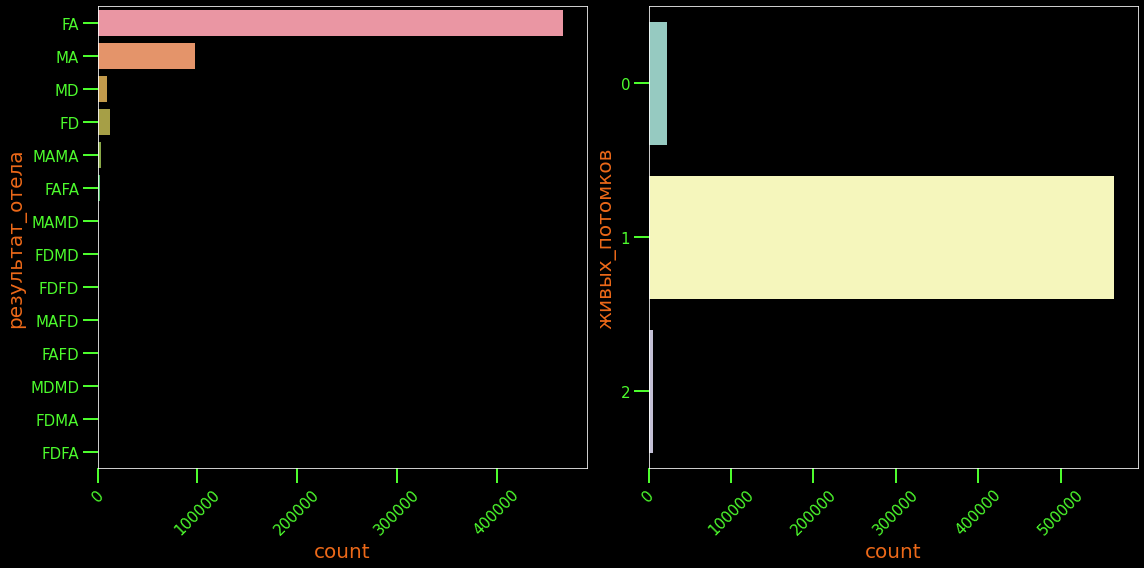

In [333]:
fig = plt.figure(figsize=(16, 8))

fig.add_subplot(1, 2, 1)
sns.countplot(y=df.результат_отела)
plt.xticks(rotation=45)

fig.add_subplot(1, 2, 2)
sns.countplot(y=df.живых_потомков)
plt.xticks(rotation=45)


fig.tight_layout()
plt.show()

In [334]:
df.isna().sum().sum()

0

In [335]:
df.describe()

,номер_животного,номер_лактации,легкость_отела,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,дни_доения_при_событии,живых_потомков
count,592307.000000,592307.000000,592307.000000,592307.000000,592307.000000,592307.000000,592307.000000,592307.000000,592307.000000
mean,561959.241464,1.128155,0.734476,19.105364,84.225510,19.055809,18.280589,209.465411,0.971408
std,350585.858440,1.331666,0.729751,28.571645,105.591151,12.715732,13.531659,185.204920,0.213833
min,142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23144.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,52.000000,1.000000
50%,707166.000000,1.000000,1.000000,0.000000,0.000000,18.000000,17.000000,163.000000,1.000000
75%,812077.000000,2.000000,1.000000,56.000000,171.000000,30.000000,30.000000,339.000000,1.000000
max,912273.000000,8.000000,5.000000,192.000000,327.000000,50.000000,50.000000,1430.000000,2.000000


In [336]:
df.событие.unique()

array(['РАСЧКОП', 'ВАКЦИН', 'ПЕРЕВОД', 'ПРОДАНА', 'МАСТИТ', 'ЗДОРОВА',
       'ХРОМОТА', 'СУХОСТ', 'ВАКВИРУС', 'ЯЛОВАЯ', 'ОСЕМЕН', 'БОЛЕЗНЬ',
       'НЕОСЕМ', 'СТЕЛН', 'ПРОФОТ', 'ОТЕЛ', 'ПАРЕЗ', 'МЕТРИТ', 'КЕТОЗ',
       'ПОСЛЕД', 'ПАЛА', 'АБОРТ', 'ВЕС', 'СТЕЛНДО', 'НА_СХЕМУ',
       'СО_СХЕМЫ', 'SOLD', 'WEIGHT', 'METR', 'DRY', 'MOVE', 'FOOTRIM',
       'WELL', 'POT', 'ILLMISC', 'MAST', 'BRED', 'LAME', 'RP', 'FRESH',
       'OPEN', 'DNB', 'NULSCM', 'ABORT', 'ДЕФЕКТ', 'СУХ2', 'TOSCM',
       'KETOS'], dtype=object)

In [337]:
dict_transl = {
    "ABORT": "АБОРТ",
    "BRED": "ОСЕМЕН",
    "DNB": "НЕОСЕМ",
    "DRY": "СУХОСТ",
    "FOOTRIM": "РАСЧКОП",
    "FRESH": "ОТЕЛ",
    "ILLMISC": "БОЛЕЗНЬ",
    "KETOS": "КЕТОЗ",
    "LAME": "ХРОМОТА",
    "MAST": "МАСТИТ",
    "METR": "МЕТРИТ",
    "MOVE": "ПЕРЕВОД",
    "NULSCM": "СО_СХЕМЫ",
    "OPEN": "ЯЛОВАЯ",
    "POT": "ПРОФОТ",
    "RP": "ПОСЛЕД",
    "SOLD": "ПРОДАНА",
    "TOSCM": "НА_СХЕМУ",
    "WEIGHT": "ВЕС",
    "WELL": "ЗДОРОВА"
}

def convert_event(event):
    if event in dict_transl:
        return dict_transl[event]
    return event

In [338]:
df.событие = df.событие.apply(convert_event)

df.событие.value_counts()

ВАКЦИН      122450
ПЕРЕВОД     114399
ВЕС          79855
ВАКВИРУС     32081
НА_СХЕМУ     32040
СТЕЛН        31982
РАСЧКОП      31215
ОСЕМЕН       28497
ЗДОРОВА      25375
ХРОМОТА      11826
ОТЕЛ         11292
ЯЛОВАЯ       10862
БОЛЕЗНЬ       9813
ПРОФОТ        8728
ПРОДАНА       8705
МАСТИТ        8368
СУХОСТ        6908
МЕТРИТ        6447
СУХ2          3503
НЕОСЕМ        2322
ПОСЛЕД        1585
КЕТОЗ         1494
АБОРТ         1343
ПАЛА           776
ПАРЕЗ          227
СО_СХЕМЫ       147
ДЕФЕКТ          34
СТЕЛНДО         33
Name: событие, dtype: int64

In [339]:
# Будем работать только с маститом
mast_ind = df[df.событие == 'МАСТИТ'].номер_животного.unique()

df = df[df.номер_животного.isin(mast_ind)]

print(df.shape, df.номер_животного.nunique())

(225621, 16) 2767


In [340]:
df

,номер_животного,ушная_бирка_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков
5,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,213,2019-03-15,МВ,1
6,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,215,2019-03-17,ТМ6_34,1
7,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,216,2019-03-18,F006T003,1
8,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,221,2019-03-23,КМ4_134,1
9,321,896820302,F,6,FA,3,2009-09-11,62,291,18,18,ЗДОРОВА,230,2019-04-01,МАСТИТ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592273,912242,912242,F,1,FA,1,2019-12-29,0,259,17,17,ВАКЦИН,306,2022-08-31,СКОУ,1
592274,912242,912242,F,1,FA,1,2019-12-29,0,259,17,17,СУХ2,306,2022-08-31,-,1
592279,912253,912253,F,1,FA,1,2019-12-30,0,266,3,17,СУХОСТ,280,2022-07-30,-,1
592280,912253,912253,F,1,FA,1,2019-12-30,0,266,17,17,ПЕРЕВОД,280,2022-07-30,F017T045,1


In [341]:
# Проверим, для всех ли животных совпадают порядковый номер и значение на бирке

df.groupby('номер_животного').ушная_бирка_животного \
                             .nunique().value_counts()

2    1758
1     861
3     148
Name: ушная_бирка_животного, dtype: int64

In [342]:
# Тем не менее, избавимся от колонки с номером бирки, так как одного идентификатора достаточно
df = df.drop('ушная_бирка_животного', axis=1)

In [343]:
# Пока рассмотрим только коров

df.пол.value_counts()

F    225621
Name: пол, dtype: int64

Комментарии - работа с полом 

In [344]:
df.пол = df.пол.apply(lambda x: 1 if x == 'F' else 0)

<!-- # Группы среди быков

df[df.пол == 'M'].номер_группы_животного.value_counts() -->

<!-- # # Группы, содержащие и быков, и коров
# groups_in_common = np.intersect1d(
#    df[df.пол == 'M'].номер_группы_животного,  df[df.пол == 'F'].номер_группы_животного
# )

# groups_in_common -->

<!-- df[df.номер_группы_животного.isin(groups_in_common)].пол.value_counts() -->

In [345]:
df.head()

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков
5,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,213,2019-03-15,МВ,1
6,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,215,2019-03-17,ТМ6_34,1
7,321,1,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,216,2019-03-18,F006T003,1
8,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,221,2019-03-23,КМ4_134,1
9,321,1,6,FA,3,2009-09-11,62,291,18,18,ЗДОРОВА,230,2019-04-01,МАСТИТ,1


Считаем, что мастит не был вылечен, если не было соответствующей записи о выздоровлении и корова умерла / была продана по причине мастита

In [346]:
df[df.событие == 'ПРОДАНА'].примечание_события.value_counts()

ПРОДАНА ; Прочее ; УВЗ8             757
ПРОДАНА ; Агалактия ; УВЗ9          259
ПРОДАНА ; Травмы ; УВЗ5             240
ПРОДАНА ; Болезни ЖКТ ; УВЗ3        192
ПРОДАНА ; Причина 12 ; УВЗ12         95
ПРОДАНА ; МясоКомбинат ; УВЗ13       65
ПРОДАНА ; Послеродовое ; УВЗ2        51
ПРОДАНА ; Пневмония ; УВЗ1           40
ПРОДАНА ; Копыта ; УВЗ4              38
ПРОДАНА ; Мастит ; УВЗ7              28
ПРОДАНА ; Болезни печени ; УВЗ11     12
SOLD ; Прочее ; УВЗ8                  7
ПРОДАНА ; Прочее ; УВЗ3               3
ПРОДАНА ; Прочее ; УВЗ2               2
ПРОДАНА ; Прочее ; УВЗ5               2
ПРОДАНА ; Прочее ; УВЗ7               2
ПРОДАНА ; Травмы ; УВЗ8               1
SOLD ; Болезни ЖКТ ; УВЗ3             1
ПРОДАНА ; Репродукция ; УВЗ6          1
ПРОДАНА ; Прочее ; УВЗ4               1
ПРОДАНА ; Травмы ; УВЗ3               1
УВЗ5                                  1
Name: примечание_события, dtype: int64

In [347]:
sold_mastit = df[df.примечание_события == 'ПРОДАНА ; Мастит ; УВЗ7']

sold_mastit.shape

(28, 15)

In [348]:
cured = df[(df.событие == 'ЗДОРОВА') & (df.примечание_события == 'МАСТИТ')].номер_животного.unique()

cured.size

2166

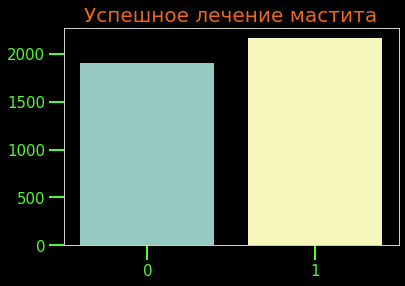

In [349]:
cured = df[(df.событие == 'ЗДОРОВА') & (df.примечание_события == 'МАСТИТ')]
not_cured = df[(df.событие.isin(['ПРОДАНА', 'ПАЛА'])) & ~(df.событие.isin(cured.номер_животного))] 

df['вылечена'] = df.номер_животного.apply(lambda x: 1 if x in cured.номер_животного else 0)

sns.barplot(x=[0, 1], y=[not_cured.номер_животного.unique().size, 
                         cured.номер_животного.unique().size])

plt.title('Успешное лечение мастита')
plt.show()

In [350]:
df.вылечена.value_counts()

0    225319
1       302
Name: вылечена, dtype: int64

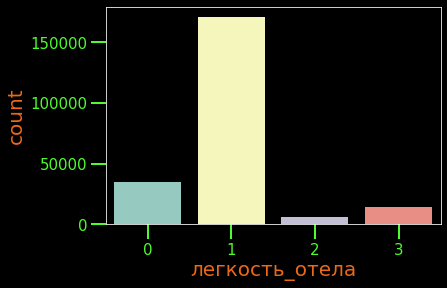

In [351]:
sns.countplot(df.легкость_отела)

plt.show()

In [352]:
df.tail()

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена
592273,912242,1,1,FA,1,2019-12-29,0,259,17,17,ВАКЦИН,306,2022-08-31,СКОУ,1,0
592274,912242,1,1,FA,1,2019-12-29,0,259,17,17,СУХ2,306,2022-08-31,-,1,0
592279,912253,1,1,FA,1,2019-12-30,0,266,3,17,СУХОСТ,280,2022-07-30,-,1,0
592280,912253,1,1,FA,1,2019-12-30,0,266,17,17,ПЕРЕВОД,280,2022-07-30,F017T045,1,0
592281,912253,1,1,FA,1,2019-12-30,0,266,45,17,ВАКЦИН,325,2022-09-13,СКОУ,1,0


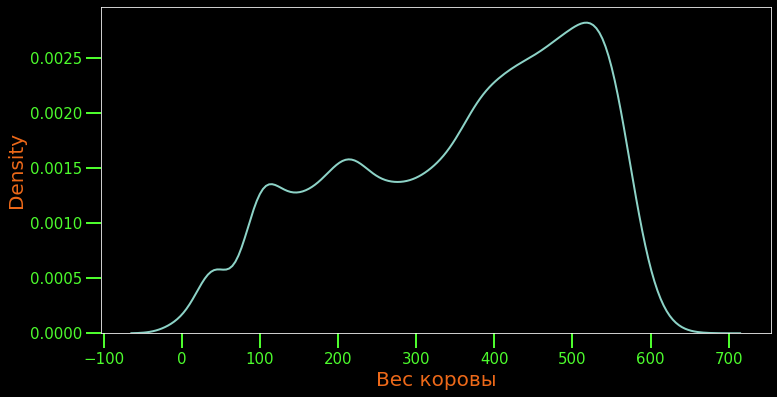

In [353]:
plt.figure(figsize=(12, 6))

weights = df[df.событие == 'ВЕС'].примечание_события.astype(int)

sns.distplot(weights, bins=np.linspace(weights.min(), weights.max()), hist=False)

plt.xlabel('Вес коровы')
plt.show()

In [354]:
# TODO: boxplots with mean weights
df[(df.вылечена == 1) & (df.событие == 'ВЕС')].shape[0]

7

Для вылеченных коров будет всего 7 значений веса

Тогда в сравнении распределений веса для выздоровевших/невыздоровевших коров нет смысла

In [355]:
df['возраст'] = (df.дата_события  - df.дата_рождения).dt.days / 365.25

df.возраст.isna().sum()

0

In [356]:
df.возраст.min()

0.0

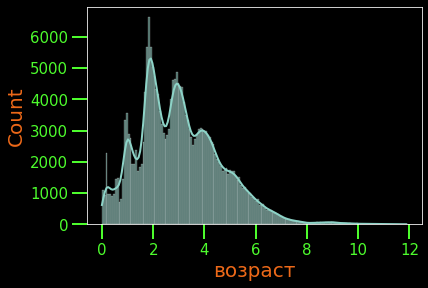

In [357]:
sns.histplot(df.возраст, kde=True)

plt.show()

In [358]:
# df_unique = df.
first_ages = df.groupby('номер_животного').возраст.first()

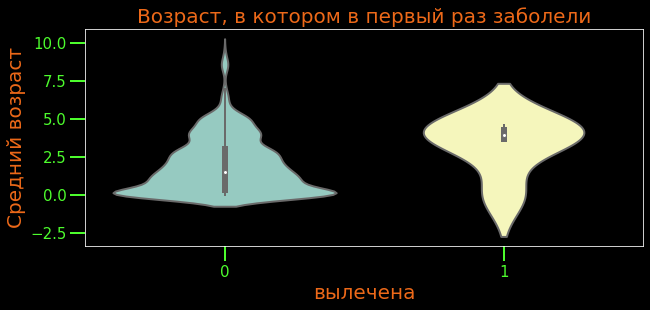

In [359]:
plt.figure(figsize=(10, 4))

df_unique = df.drop_duplicates('номер_животного')

# sns.violinplot(x=df.вылечена, y=df.возраст)
sns.violinplot(x=df_unique.вылечена, y=df_unique.номер_животного.map(first_ages))

plt.title('Возраст, в котором в первый раз заболели')
plt.ylabel('Средний возраст')
plt.show()

In [360]:
df.shape[0]

225621

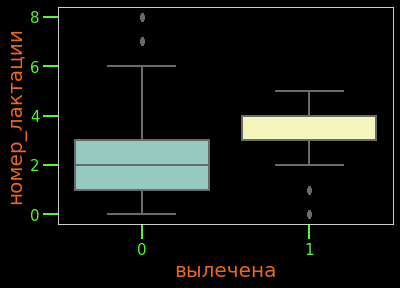

In [361]:
sns.boxplot(x=df.вылечена, y=df.номер_лактации)

plt.show()

Проведем промежуточные итоги - вычислим, есть ли статистически значимая разница между возрастами и номерами лактации для вылечившихся и невылечившихся коров

Конечно есть некие условности, как, например, независимость наблюдений между и внутри выборок, но пренебрежем этим

In [362]:
from scipy.stats import ttest_ind, mannwhitneyu, bootstrap

def get_p_values(a, b, variable_name):
    print(f'\t\t==={variable_name}===')
    
    print('Ttest output:\t', ttest_ind(a, b, alternative='two-sided').pvalue)
    print('Mann-Whitney-Wilcoxon:\t', mannwhitneyu(a, b, alternative='two-sided').pvalue)

def bootstrap_confint(a, b):
    bs = bootstrap(
        data=(b,),
        statistic=np.mean,
        confidence_level=0.95,
        n_resamples=1000
    )
    print('Bootstrap confint:\t', 
          a.mean() < bs.confidence_interval.low or a.mean() > bs.confidence_interval.high)

In [363]:
A = df_unique[df_unique.вылечена == 0]
B = df_unique[df_unique.вылечена == 1]

A['первый_возраст'] = A.номер_животного.map(first_ages)
B['первый_возраст'] = B.номер_животного.map(first_ages)


get_p_values(A.первый_возраст, B.первый_возраст, 'Возраст')
bootstrap_confint(A.возраст, B.возраст)
print("_____________")
get_p_values(A.номер_лактации, B.номер_лактации, 'Номер лактации')
bootstrap_confint(A.номер_лактации, B.номер_лактации)

		===Возраст===
Ttest output:	 0.08914954175610681
Mann-Whitney-Wilcoxon:	 0.10758514149938096
Bootstrap confint:	 False
_____________
		===Номер лактации===
Ttest output:	 0.06135989418305116
Mann-Whitney-Wilcoxon:	 0.03785726660974472
Bootstrap confint:	 False


In [364]:
A = df[df.вылечена == 0]
B = df[df.вылечена == 1]

get_p_values(A.возраст, B.возраст, 'Возраст')
bootstrap_confint(A.возраст, B.возраст)
print("_____________")
get_p_values(A.номер_лактации, B.номер_лактации, 'Номер лактации')
bootstrap_confint(A.номер_лактации, B.номер_лактации)

		===Возраст===
Ttest output:	 7.327883688636958e-50
Mann-Whitney-Wilcoxon:	 8.381190586230363e-53
Bootstrap confint:	 True
_____________
		===Номер лактации===
Ttest output:	 7.148059164757116e-49
Mann-Whitney-Wilcoxon:	 1.8648575179565476e-49
Bootstrap confint:	 True


Все три теста показывают значения **p-value** меньшее, чем *0.05*, поэтому мы можем быть на *95%* уверены, что распределения возраста и номера текущей лактации различаются для коров с разными статусами `вылечена`

In [369]:
df.head()

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст
5,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,213,2019-03-15,МВ,1,0,9.505818
6,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,215,2019-03-17,ТМ6_34,1,0,9.511294
7,321,1,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,216,2019-03-18,F006T003,1,0,9.514031
8,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,221,2019-03-23,КМ4_134,1,0,9.527721
9,321,1,6,FA,3,2009-09-11,62,291,18,18,ЗДОРОВА,230,2019-04-01,МАСТИТ,1,0,9.552361


In [370]:
df[df.событие == 'МАСТИТ'].примечание_события

5              МВ
6          ТМ6_34
8         КМ4_134
89          КМ3_4
92         КМ5_34
           ...   
591826      КМ1_1
591869      ТМ2_3
592067      КМ6_3
592101      КМ1_4
592127    КМ1_1_4
Name: примечание_события, Length: 8368, dtype: object

Странное значение колонки с примечаниями - **КМ1_1_4**

In [371]:
df.примечание_события.apply(lambda x: Counter(x)['_']).value_counts()

0    212294
1     12981
2       346
Name: примечание_события, dtype: int64

In [372]:
df[df.событие == 'ПЕРЕВОД'].sample(10)

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст
162391,902019,1,0,FA,0,2019-02-03,0,84,31,31,ПЕРЕВОД,395,2020-03-04,F030T031,1,0,1.081451
360517,907222,1,1,FA,1,2019-07-30,0,0,9,2,ПЕРЕВОД,1,2021-04-16,F044T021,1,0,1.713895
353309,906075,1,1,MD,1,2019-06-12,0,0,9,3,ПЕРЕВОД,9,2021-04-08,F021T002,0,0,1.823409
45018,211102,1,5,FA,1,2012-11-19,62,274,18,18,ПЕРЕВОД,235,2019-06-17,F042T001,1,0,6.573580
481750,806161,1,2,MA,1,2018-06-29,58,118,7,3,ПЕРЕВОД,264,2022-01-06,F007T003,1,0,3.523614
250327,909028,1,0,FA,0,2019-09-05,0,0,30,30,ПЕРЕВОД,370,2020-09-09,F029T024,1,0,1.013005
40944,811026,1,0,FA,0,2018-11-04,0,136,31,31,ПЕРЕВОД,200,2019-05-23,F038T034,1,0,0.547570
407083,807006,1,2,FA,1,2018-07-01,66,0,4,2,ПЕРЕВОД,2,2021-07-26,F044T021,1,0,3.069131
217296,707163,1,2,FA,1,2017-07-28,53,0,4,2,ПЕРЕВОД,8,2020-06-30,F021T002,1,0,2.924025
91998,712065,1,1,FA,1,2017-12-08,0,69,8,8,ПЕРЕВОД,12,2019-10-15,F021T002,1,0,1.850787


Сколько раз коровы выздоравливали от мастита

In [373]:
df[(df.событие == 'ЗДОРОВА') & (df.примечание_события == 'МАСТИТ')] \
    .groupby('номер_животного').возраст.count().value_counts()

1     1166
2      567
3      229
4      105
5       52
6       19
7       12
8        9
10       4
11       2
9        1
Name: возраст, dtype: int64

Графики общего количества коров и числа заболевших маститом

In [374]:
f = codecs.open('../data/dump_19_22.csv', 'r', 'cp1251')
total_df = pd.read_csv(f, sep=';', encoding='utf-8')

total_df.columns = pd.Series(total_df.columns).apply(lambda x: x.lower().replace(' ', '_'))

total_df.дата_рождения = total_df.дата_рождения.apply(lambda x: datetime.strptime(x,"%d.%m.%Y"))
total_df.дата_события = total_df.дата_события.apply(lambda x: datetime.strptime(x,"%d.%m.%Y"))

total_df['год'] = total_df.дата_события.dt.year

total_df['год_месяц'] = total_df.дата_события.dt.to_period('M')

In [375]:
df['месяц'] = df.дата_события.dt.month
df['год'] = df.дата_события.dt.year

df['год_месяц'] = df.дата_события.dt.to_period('M')

df[df.событие == 'МАСТИТ'] \
    .drop_duplicates(['номер_животного', 'год'])

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц
5,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,213,2019-03-15,МВ,1,0,9.505818,3,2019,2019-03
89,1540,1,6,FA,1,2010-07-18,56,0,43,43,МАСТИТ,173,2019-04-03,КМ3_4,1,0,8.709103,4,2019,2019-04
125,1978,1,6,FA,1,2010-11-12,58,0,41,1,МАСТИТ,219,2019-03-12,КМ5_12,1,0,8.328542,3,2019,2019-03
162,2215,1,5,MA,1,2010-03-27,70,281,18,18,МАСТИТ,431,2019-04-14,КМ3_4,1,0,9.048597,4,2019,2019-04
178,2389,1,6,FA,1,2010-03-30,59,0,41,41,МАСТИТ,294,2019-03-12,КМ5_12,1,0,8.950034,3,2019,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591821,912007,1,1,MA,1,2019-12-01,0,0,3,3,МАСТИТ,280,2022-08-04,КМ1_4,1,0,2.674880,8,2022,2022-08
591826,912008,1,1,FA,1,2019-12-01,0,234,3,5,МАСТИТ,321,2022-08-19,КМ1_1,1,0,2.715948,8,2022,2022-08
591869,912023,1,1,FA,1,2019-12-03,0,179,3,43,МАСТИТ,324,2022-08-01,ТМ2_3,1,0,2.661191,8,2022,2022-08
592067,912105,1,1,MA,1,2019-12-13,0,119,3,3,МАСТИТ,270,2022-08-27,КМ6_3,1,0,2.704997,8,2022,2022-08


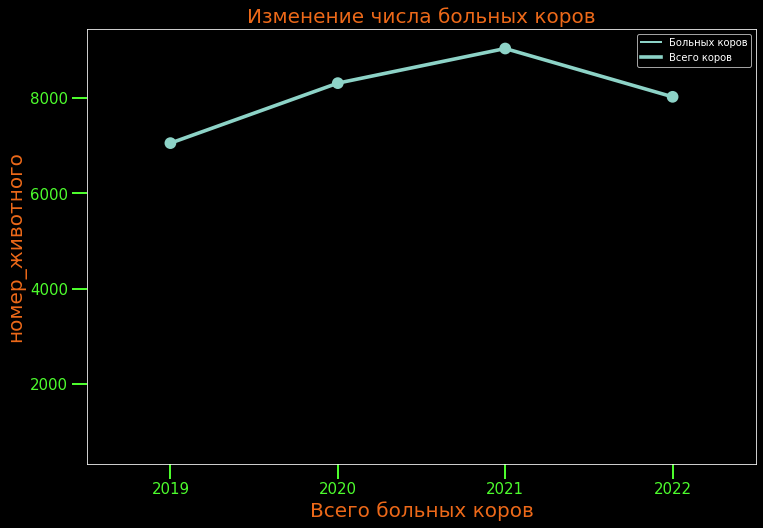

In [376]:
# import plotly.express as px
plt.figure(figsize=(12, 8))

year_unique = df[df.событие == 'МАСТИТ'] \
              .drop_duplicates(['номер_животного', 'год']).copy()
year_stats = year_unique.groupby('год').номер_животного.count()

year_unique_total = total_df.drop_duplicates(['номер_животного', 'год']).copy()
year_stats_total = year_unique_total.groupby('год').номер_животного.count()

sns.lineplot(x=year_stats.index, y=year_stats)
sns.pointplot(x=year_stats_total.index, y=year_stats_total)

plt.legend(['Больных коров', 'Всего коров'])
plt.xlabel('Всего больных коров')
plt.title('Изменение числа больных коров')
# plt.xticks(year_stats.index)
plt.show()

In [377]:
month_year_unique = total_df[total_df.событие == 'МАСТИТ'] \
              .drop_duplicates(['номер_животного', 'год']).copy()
month_year_stats = month_year_unique.groupby(['год_месяц']).номер_животного.count()

month_year_unique_total = total_df.drop_duplicates(['номер_животного', 'год_месяц']).copy()
month_year_stats_total = month_year_unique_total.groupby(['год_месяц']).номер_животного.count()

In [378]:
# import plotly.express as px

# px.line(x=range(month_year_stats.size), y=month_year_stats.values)

In [379]:
month_year_stats.index

PeriodIndex(['2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
             '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
             '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
             '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
             '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
             '2022-09'],
            dtype='period[M]', name='год_месяц')

In [380]:
total_df.head()


,номер_животного,ушная_бирка_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,год,год_месяц
0,146,598621616,F,6,FA,1,2010-03-29,62,277,18,18,РАСЧКОП,336,2019-03-28,КАН,2019,2019-03
1,146,598621616,F,6,FA,1,2010-03-29,62,277,18,18,ВАКЦИН,349,2019-04-10,КОГЛАВАК,2019,2019-04
2,146,598621616,F,6,FA,1,2010-03-29,62,277,18,18,ВАКЦИН,349,2019-04-10,ЛЕПТО,2019,2019-04
3,291,530073354,F,6,MA,1,2009-07-30,68,0,23,23,ПЕРЕВОД,448,2019-04-08,F001T023,2019,2019-04
4,291,530073354,F,6,MA,1,2009-07-30,68,0,23,23,ПРОДАНА,458,2019-04-18,ПРОДАНА ; Прочее ; УВЗ8,2019,2019-04


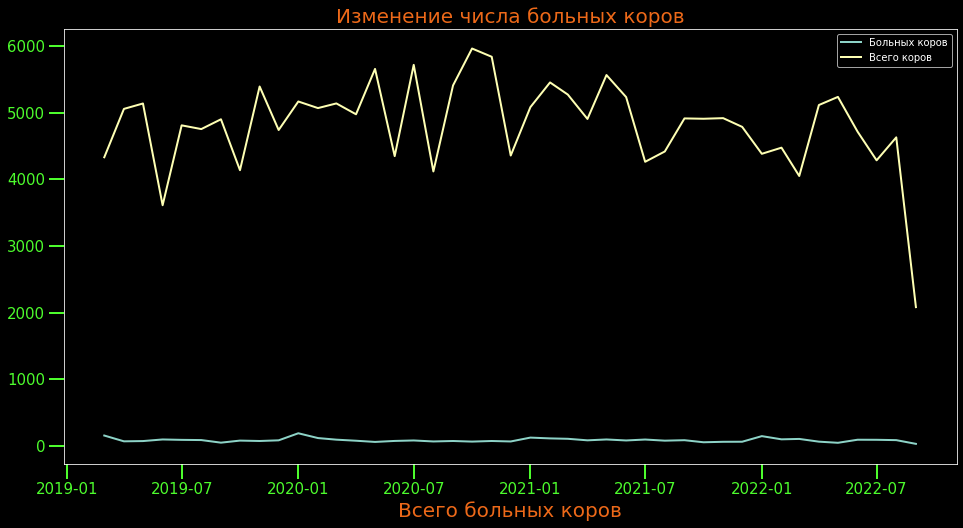

In [381]:
plt.figure(figsize=(16, 8))

sns.lineplot(x=month_year_stats.index.to_timestamp(), y=month_year_stats.values)
sns.lineplot(x=month_year_stats.index.to_timestamp(), y=month_year_stats_total.values)


# ax.set_xticklabels(labels=month_year_stats.reset_index().год_месяц.values
plt.legend(['Больных коров', 'Всего коров'])
plt.xlabel('Всего больных коров')
plt.title('Изменение числа больных коров')
plt.show()

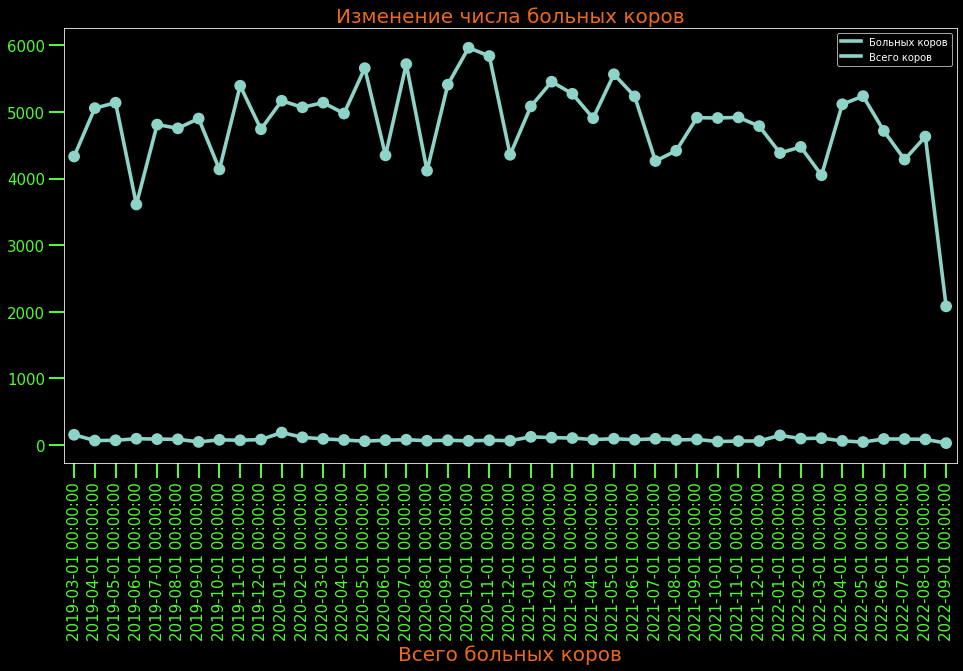

In [382]:
plt.figure(figsize=(16, 8))

sns.pointplot(x=month_year_stats.index.to_timestamp(), y=month_year_stats.values)
sns.pointplot(x=month_year_stats.index.to_timestamp(), y=month_year_stats_total.values)


# ax.set_xticklabels(labels=month_year_stats.reset_index().год_месяц.values
plt.legend(['Больных коров', 'Всего коров'])
plt.xlabel('Всего больных коров')
plt.title('Изменение числа больных коров')
plt.xticks(rotation=90)
plt.show()

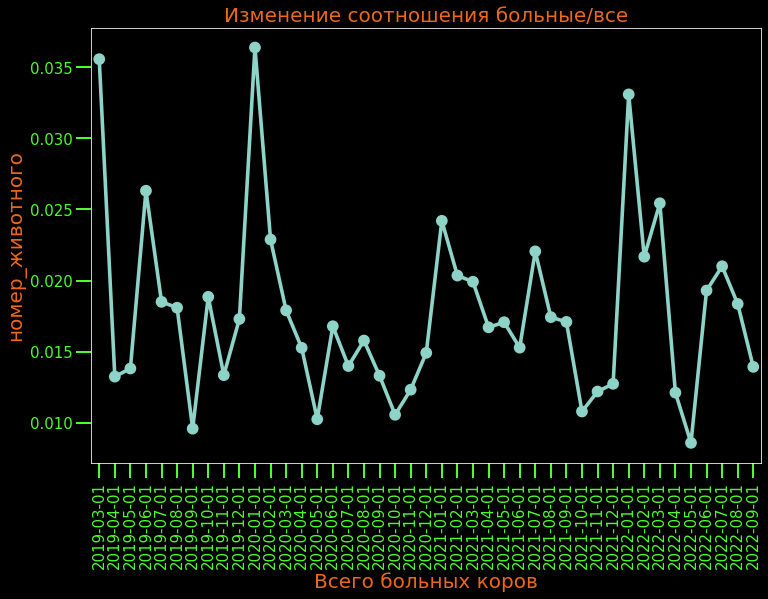

In [393]:
plt.figure(figsize=(12, 8))

sns.pointplot(x=pd.to_datetime(month_year_stats.index.to_timestamp()).date, 
              y=month_year_stats / month_year_stats_total)

plt.title('Изменение соотношения больные/все')
plt.xlabel('Всего больных коров')
plt.xticks(rotation=90)
plt.show()

In [68]:
total_df.номер_животного.nunique()

15322

In [69]:
total_df[total_df.событие == 'МАСТИТ'].номер_животного.nunique()

2767

In [70]:
df.head()

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц
5,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,213,2019-03-15,МВ,1,0,9.505818,3,2019,2019-03
6,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,215,2019-03-17,ТМ6_34,1,0,9.511294,3,2019,2019-03
7,321,1,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,216,2019-03-18,F006T003,1,0,9.514031,3,2019,2019-03
8,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,221,2019-03-23,КМ4_134,1,0,9.527721,3,2019,2019-03
9,321,1,6,FA,3,2009-09-11,62,291,18,18,ЗДОРОВА,230,2019-04-01,МАСТИТ,1,0,9.552361,4,2019,2019-04


In [71]:
df[df.событие == 'МАСТИТ'].head()

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц
5,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,213,2019-03-15,МВ,1,0,9.505818,3,2019,2019-03
6,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,215,2019-03-17,ТМ6_34,1,0,9.511294,3,2019,2019-03
8,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,221,2019-03-23,КМ4_134,1,0,9.527721,3,2019,2019-03
89,1540,1,6,FA,1,2010-07-18,56,0,43,43,МАСТИТ,173,2019-04-03,КМ3_4,1,0,8.709103,4,2019,2019-04
92,1540,1,6,FA,1,2010-07-18,56,0,43,43,МАСТИТ,183,2019-04-13,КМ5_34,1,0,8.736482,4,2019,2019-04


In [72]:
df.номер_животного.nunique()

2767

## Парсинг актуальных переходов между группами: данные в изначальных колонках неактуальны

In [184]:
df_moves = df[df.событие == 'ПЕРЕВОД'].copy()

df_moves.head()

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц
7,321,1,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,216,2019-03-18,F006T003,1,0,9.514031,3,2019,2019-03
10,321,1,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,231,2019-04-02,F004T012,1,0,9.555099,4,2019,2019-04
17,321,1,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,252,2019-04-23,F004T012,1,0,9.612594,4,2019,2019-04
45,675,1,7,FD,1,2009-11-02,60,0,43,3,ПЕРЕВОД,191,2019-04-02,F010T007,0,0,9.412731,4,2019,2019-04
48,784,1,7,MA,1,2010-04-27,60,279,18,18,ПЕРЕВОД,430,2019-03-06,F017T018,1,0,8.856947,3,2019,2019-03


In [185]:
# Длина примечаний
df_moves.примечание_события.str.len().value_counts()

8    44884
Name: примечание_события, dtype: int64

In [186]:
# Первые символы в примечаниях
df_moves.примечание_события.str[0].value_counts()

F    44884
Name: примечание_события, dtype: int64

In [187]:
# Пятые символы в причаниях
df_moves.примечание_события.str[4].value_counts()

T    44884
Name: примечание_события, dtype: int64

Все примечания по переводам между группами состоят из 8 символов, первый из которых - `F`, а пятый - `T`

Тогда номер группы, из которой осуществляется переход - три цифры между `F` и `T`

Аналогично, номер группы, в которую осуществляется переход - это цифры после `T`

In [188]:
def from_transitions_parser(trans_log):
    return int(trans_log[1:4])

def to_transition_parser(trans_log):
    return int(trans_log[5:])

In [189]:
test_log = df_moves.iloc[0]['примечание_события']
print(f'Log to parse:\t', test_log)

print(from_transitions_parser(test_log), to_transition_parser(test_log))

Log to parse:	 F006T003
6 3


In [190]:
df_moves[['номер_группы_животного', 'предыдущий_номер_группы_животного']] = \
    df_moves.примечание_события.apply([to_transition_parser, from_transitions_parser])

In [191]:
df_moves.head()

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц
7,321,1,6,FA,3,2009-09-11,62,291,3,6,ПЕРЕВОД,216,2019-03-18,F006T003,1,0,9.514031,3,2019,2019-03
10,321,1,6,FA,3,2009-09-11,62,291,12,4,ПЕРЕВОД,231,2019-04-02,F004T012,1,0,9.555099,4,2019,2019-04
17,321,1,6,FA,3,2009-09-11,62,291,12,4,ПЕРЕВОД,252,2019-04-23,F004T012,1,0,9.612594,4,2019,2019-04
45,675,1,7,FD,1,2009-11-02,60,0,7,10,ПЕРЕВОД,191,2019-04-02,F010T007,0,0,9.412731,4,2019,2019-04
48,784,1,7,MA,1,2010-04-27,60,279,18,17,ПЕРЕВОД,430,2019-03-06,F017T018,1,0,8.856947,3,2019,2019-03


In [192]:
output = df_moves.copy().drop(
    ['живых_потомков', 'вылечена', 'возраст', 'месяц', 'год', 'год_месяц']
    , axis=1
)

In [193]:
output.columns

Index(['номер_животного', 'пол', 'номер_лактации', 'результат_отела',
       'легкость_отела', 'дата_рождения',
       'дней_в_сухостое_предыдущей_лактации', 'дней_стельности_при_событии',
       'номер_группы_животного', 'предыдущий_номер_группы_животного',
       'событие', 'дни_доения_при_событии', 'дата_события',
       'примечание_события'],
      dtype='object')

In [194]:
output.columns = ['Номер Животного', 'Пол', 'Номер лактации', 'Результат отела'
                    , 'Легкость отела', 'Дата рождения', 'Дней в сухостое предыдущей лактации'
                    , 'Дней стельности при событии', 'Номер группы животного'
                    , 'Предыдущий номер группы животного', 'Событие', 'Дни доения при событии'
                    , 'Дата события', 'Примечание события']

In [195]:
output.head()

,Номер Животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
7,321,1,6,FA,3,2009-09-11,62,291,3,6,ПЕРЕВОД,216,2019-03-18,F006T003
10,321,1,6,FA,3,2009-09-11,62,291,12,4,ПЕРЕВОД,231,2019-04-02,F004T012
17,321,1,6,FA,3,2009-09-11,62,291,12,4,ПЕРЕВОД,252,2019-04-23,F004T012
45,675,1,7,FD,1,2009-11-02,60,0,7,10,ПЕРЕВОД,191,2019-04-02,F010T007
48,784,1,7,MA,1,2010-04-27,60,279,18,17,ПЕРЕВОД,430,2019-03-06,F017T018


In [196]:
output.to_csv('group_transitions.csv', index=False)

In [197]:
pd.read_csv('group_transitions.csv').head(1)

,Номер Животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
0,321,1,6,FA,3,2009-09-11,62,291,3,6,ПЕРЕВОД,216,2019-03-18,F006T003


In [198]:
df_moves['группа_изменена'] = 1

df_moves.группа_изменена.value_counts()

1    44884
Name: группа_изменена, dtype: int64

In [199]:
df_moves.columns

Index(['номер_животного', 'пол', 'номер_лактации', 'результат_отела',
       'легкость_отела', 'дата_рождения',
       'дней_в_сухостое_предыдущей_лактации', 'дней_стельности_при_событии',
       'номер_группы_животного', 'предыдущий_номер_группы_животного',
       'событие', 'дни_доения_при_событии', 'дата_события',
       'примечание_события', 'живых_потомков', 'вылечена', 'возраст', 'месяц',
       'год', 'год_месяц', 'группа_изменена'],
      dtype='object')

In [200]:
df.columns

Index(['номер_животного', 'пол', 'номер_лактации', 'результат_отела',
       'легкость_отела', 'дата_рождения',
       'дней_в_сухостое_предыдущей_лактации', 'дней_стельности_при_событии',
       'номер_группы_животного', 'предыдущий_номер_группы_животного',
       'событие', 'дни_доения_при_событии', 'дата_события',
       'примечание_события', 'живых_потомков', 'вылечена', 'возраст', 'месяц',
       'год', 'год_месяц'],
      dtype='object')

In [201]:
select_df = ['номер_животного', 'номер_лактации', 'дней_в_сухостое_предыдущей_лактации'
                  ,  'дней_стельности_при_событии', 'событие' 
                  , 'дата_события','примечание_события', 'группа_изменена']
merge_on = ['номер_животного', 'номер_лактации', 'дней_в_сухостое_предыдущей_лактации'
        ,'дней_стельности_при_событии', 'событие', 'дата_события','примечание_события']

In [202]:
df_updated = pd.merge(
    df, df_moves[select_df],
    on=merge_on,
    how='left'
)

df_updated.head()

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц,группа_изменена
0,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,213,2019-03-15,МВ,1,0,9.505818,3,2019,2019-03,NaN
1,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,215,2019-03-17,ТМ6_34,1,0,9.511294,3,2019,2019-03,NaN
2,321,1,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,216,2019-03-18,F006T003,1,0,9.514031,3,2019,2019-03,1.0
3,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,221,2019-03-23,КМ4_134,1,0,9.527721,3,2019,2019-03,NaN
4,321,1,6,FA,3,2009-09-11,62,291,18,18,ЗДОРОВА,230,2019-04-01,МАСТИТ,1,0,9.552361,4,2019,2019-04,NaN


In [203]:
df.shape[0] - df_moves.shape[0] - df_updated.группа_изменена.isna().sum()

0

Смерджили правильно :)

In [204]:
df_updated.группа_изменена = df_updated.группа_изменена.fillna(0)

df_updated.isna().sum().sum()

0

In [205]:
df_updated

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц,группа_изменена
0,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,213,2019-03-15,МВ,1,0,9.505818,3,2019,2019-03,0.0
1,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,215,2019-03-17,ТМ6_34,1,0,9.511294,3,2019,2019-03,0.0
2,321,1,6,FA,3,2009-09-11,62,291,18,18,ПЕРЕВОД,216,2019-03-18,F006T003,1,0,9.514031,3,2019,2019-03,1.0
3,321,1,6,FA,3,2009-09-11,62,291,18,18,МАСТИТ,221,2019-03-23,КМ4_134,1,0,9.527721,3,2019,2019-03,0.0
4,321,1,6,FA,3,2009-09-11,62,291,18,18,ЗДОРОВА,230,2019-04-01,МАСТИТ,1,0,9.552361,4,2019,2019-04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225664,912242,1,1,FA,1,2019-12-29,0,259,17,17,ВАКЦИН,306,2022-08-31,СКОУ,1,0,2.672142,8,2022,2022-08,0.0
225665,912242,1,1,FA,1,2019-12-29,0,259,17,17,СУХ2,306,2022-08-31,-,1,0,2.672142,8,2022,2022-08,0.0
225666,912253,1,1,FA,1,2019-12-30,0,266,3,17,СУХОСТ,280,2022-07-30,-,1,0,2.581793,7,2022,2022-07,0.0
225667,912253,1,1,FA,1,2019-12-30,0,266,17,17,ПЕРЕВОД,280,2022-07-30,F017T045,1,0,2.581793,7,2022,2022-07,1.0


In [236]:
df_tmp = df_updated.copy().sort_values('дата_события')

df_moves = df_moves.sort_values('дата_события')

In [237]:
df_moves.head(1)

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц,группа_изменена
9718,611004,1,1,MA,1,2016-11-01,0,274,5,9,ПЕРЕВОД,173,2019-03-05,F009T005,1,0,2.338125,3,2019,2019-03,1


In [238]:
group_history = dict()
undetected_cows = []

for cow in df_tmp.номер_животного.unique():
    if cow not in group_history.keys(): 
        if df_moves[df_moves.номер_животного == cow].size == 0:
            undetected_cows.append(cow)
        else:
            group_history[cow] = [df_moves[df_moves.номер_животного == cow] \
                                      .iloc[0]['предыдущий_номер_группы_животного']]

In [239]:
group_history[605084]

[44]

In [240]:
df_moves[df_moves.номер_животного == 605084]

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц,группа_изменена
8041,605084,1,2,FA,1,2016-05-17,54,265,21,44,ПЕРЕВОД,1,2019-03-06,F044T021,1,0,2.800821,3,2019,2019-03,1
8042,605084,1,2,FA,1,2016-05-17,54,265,2,21,ПЕРЕВОД,10,2019-03-15,F021T002,1,0,2.825462,3,2019,2019-03,1
68951,605084,1,2,FA,1,2016-05-17,54,265,12,10,ПЕРЕВОД,198,2019-09-19,F010T012,1,0,3.340178,9,2019,2019-09,1
154109,605084,1,2,FA,1,2016-05-17,54,265,6,7,ПЕРЕВОД,351,2020-02-19,F007T006,1,0,3.759069,2,2020,2020-02,1
169156,605084,1,2,FA,1,2016-05-17,54,271,18,17,ПЕРЕВОД,384,2020-03-23,F017T018,1,0,3.849418,3,2020,2020-03,1
180707,605084,1,3,MA,1,2016-05-17,55,0,21,44,ПЕРЕВОД,1,2020-04-16,F044T021,1,0,3.915127,4,2020,2020-04,1
185185,605084,1,3,MA,1,2016-05-17,55,0,2,21,ПЕРЕВОД,8,2020-04-23,F021T002,1,0,3.934292,4,2020,2020-04,1
193035,605084,1,3,MA,1,2016-05-17,55,0,44,2,ПЕРЕВОД,21,2020-05-06,F002T044,1,0,3.969884,5,2020,2020-05,1


In [241]:
df_tmp.номер_животного.nunique() == len(group_history) + len(undetected_cows)

True

In [242]:
df_tmp = df_tmp.reset_index().drop('index', axis=1)

In [244]:
counter = 0

for i in range(df_tmp.shape[0]):
    row = df_tmp.iloc[i]
    
#     print(row['группа_изменена'])
    
    if row['группа_изменена'] == 1:
                
        trans_log = row['примечание_события']
        
#         print(from_transitions_parser(trans_log), to_transition_parser(trans_log))

        df_tmp.at[i, 'предыдущий_номер_группы_животного'] = from_transitions_parser(trans_log)
        df_tmp.at[i, 'номер_группы_животного'] = to_transition_parser(trans_log)
        
        group_history[row['номер_животного']].append(row['номер_группы_животного'])
        
    elif row['номер_животного'] not in undetected_cows:
        df_tmp.at[i, 'предыдущий_номер_группы_животного'] = group_history[row['номер_животного']][-1]
        df_tmp.at[i, 'номер_группы_животного'] = group_history[row['номер_животного']][-1]
        
    else:
        df_tmp.at[i, 'предыдущий_номер_группы_животного'] = -1
        df_tmp.at[i, 'номер_группы_животного'] = -1
    
#     counter += 1    
#     if counter == 3: break

In [245]:
df_tmp.head()

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц,группа_изменена
0,312037,1,3,MA,1,2013-12-06,130,282,4,7,ПЕРЕВОД,223,2019-03-05,F007T004,1,0,5.242984,3,2019,2019-03,1.0
1,605084,1,2,FA,1,2016-05-17,54,265,44,44,ПРОФОТ,0,2019-03-05,ПРОФ2,1,0,2.798084,3,2019,2019-03,0.0
2,802054,1,0,FA,1,2018-02-09,0,266,22,25,ПЕРЕВОД,389,2019-03-05,F025T022,1,0,1.065024,3,2019,2019-03,1.0
3,802055,1,0,FA,1,2018-02-09,0,275,22,25,ПЕРЕВОД,389,2019-03-05,F025T022,1,0,1.065024,3,2019,2019-03,1.0
4,501121,1,3,FD,1,2015-01-16,55,48,10,10,РАСЧКОП,20,2019-03-05,РДК,0,0,4.131417,3,2019,2019-03,0.0


In [249]:
df_tmp[
    ['номер_животного', 'номер_группы_животного'
     , 'предыдущий_номер_группы_животного', 'примечание_события']
].head(20)

,номер_животного,номер_группы_животного,предыдущий_номер_группы_животного,примечание_события
0,312037,4,7,F007T004
1,605084,44,44,ПРОФ2
2,802054,22,25,F025T022
3,802055,22,25,F025T022
4,501121,10,10,РДК
5,701044,9,9,1H11917
6,802061,22,25,F025T022
7,611004,5,9,F009T005
8,802070,22,25,F025T022
9,403091,44,44,-


In [250]:
df_tmp

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц,группа_изменена
0,312037,1,3,MA,1,2013-12-06,130,282,4,7,ПЕРЕВОД,223,2019-03-05,F007T004,1,0,5.242984,3,2019,2019-03,1.0
1,605084,1,2,FA,1,2016-05-17,54,265,44,44,ПРОФОТ,0,2019-03-05,ПРОФ2,1,0,2.798084,3,2019,2019-03,0.0
2,802054,1,0,FA,1,2018-02-09,0,266,22,25,ПЕРЕВОД,389,2019-03-05,F025T022,1,0,1.065024,3,2019,2019-03,1.0
3,802055,1,0,FA,1,2018-02-09,0,275,22,25,ПЕРЕВОД,389,2019-03-05,F025T022,1,0,1.065024,3,2019,2019-03,1.0
4,501121,1,3,FD,1,2015-01-16,55,48,10,10,РАСЧКОП,20,2019-03-05,РДК,0,0,4.131417,3,2019,2019-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225664,901205,1,2,FA,1,2019-01-25,63,0,6,5,ПЕРЕВОД,287,2022-09-15,F005T006,1,0,3.638604,9,2022,2022-09,1.0
225665,903083,1,2,FA,1,2019-03-13,57,217,7,7,СУХОСТ,279,2022-09-15,CEBA,1,0,3.509925,9,2022,2022-09,0.0
225666,810181,1,2,FA,1,2018-10-31,72,217,6,6,СУХОСТ,391,2022-09-15,CEBA,1,0,3.874059,9,2022,2022-09,0.0
225667,910195,1,1,MA,1,2019-10-31,0,218,5,5,СУХОСТ,275,2022-09-15,CEBA,1,0,2.874743,9,2022,2022-09,0.0


In [253]:
df.shape

(225621, 20)

In [256]:
df_tmp = df_tmp.drop('группа_изменена', axis=1)

df_tmp.shape

(225669, 20)

In [259]:
df_tmp[df_tmp.номер_группы_животного == -1].shape

,номер_животного,пол,номер_лактации,результат_отела,легкость_отела,дата_рождения,дней_в_сухостое_предыдущей_лактации,дней_стельности_при_событии,номер_группы_животного,предыдущий_номер_группы_животного,событие,дни_доения_при_событии,дата_события,примечание_события,живых_потомков,вылечена,возраст,месяц,год,год_месяц
512,502124,1,3,FA,1,2015-02-18,146,0,-1,-1,МАСТИТ,23,2019-03-10,МВ,1,0,4.054757,3,2019,2019-03
761,502124,1,3,FA,1,2015-02-18,146,0,-1,-1,МАСТИТ,24,2019-03-11,МВ,1,0,4.057495,3,2019,2019-03
783,411137,1,3,MA,1,2014-11-25,59,0,-1,-1,ЗДОРОВА,36,2019-03-11,МАСТИТ,1,0,4.290212,3,2019,2019-03
812,702674,1,5,FA,1,2010-12-22,180,0,-1,-1,МАСТИТ,225,2019-03-12,КМ5_23,1,0,8.219028,3,2019,2019-03
1011,502124,1,3,FA,1,2015-02-18,146,0,-1,-1,ЗДОРОВА,25,2019-03-12,ГИНЕКОЛ,1,0,4.060233,3,2019,2019-03
1016,502124,1,3,FA,1,2015-02-18,146,0,-1,-1,МАСТИТ,25,2019-03-12,КМ5_12,1,0,4.060233,3,2019,2019-03
1057,502124,1,3,FA,1,2015-02-18,146,0,-1,-1,МАСТИТ,26,2019-03-13,КМ3_12,1,0,4.062971,3,2019,2019-03
1059,502124,1,3,FA,1,2015-02-18,146,0,-1,-1,МАСТИТ,26,2019-03-13,КМ6_12,1,0,4.062971,3,2019,2019-03
1294,702674,1,5,FA,1,2010-12-22,180,0,-1,-1,АБОРТ,227,2019-03-14,69 ДНИ,1,0,8.224504,3,2019,2019-03
1295,702674,1,5,FA,1,2010-12-22,180,0,-1,-1,ЯЛОВАЯ,227,2019-03-14,-,1,0,8.224504,3,2019,2019-03


In [261]:
total_df.columns

Index(['номер_животного', 'ушная_бирка_животного', 'пол', 'номер_лактации',
       'результат_отела', 'легкость_отела', 'дата_рождения',
       'дней_в_сухостое_предыдущей_лактации', 'дней_стельности_при_событии',
       'номер_группы_животного', 'предыдущий_номер_группы_животного',
       'событие', 'дни_доения_при_событии', 'дата_события',
       'примечание_события', 'год', 'год_месяц'],
      dtype='object')

In [262]:
df_tmp = df_tmp.copy().drop(
    ['живых_потомков', 'вылечена', 'возраст', 'месяц', 'год', 'год_месяц']
    , axis=1
)

df_tmp.columns = ['Номер Животного', 'Пол', 'Номер лактации', 'Результат отела'
                    , 'Легкость отела', 'Дата рождения', 'Дней в сухостое предыдущей лактации'
                    , 'Дней стельности при событии', 'Номер группы животного'
                    , 'Предыдущий номер группы животного', 'Событие', 'Дни доения при событии'
                    , 'Дата события', 'Примечание события']

In [263]:
df_tmp.isna().sum().sum()

0

In [264]:
df_tmp.to_csv('damp_with_valid_groups.csv', index=False)